In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("fetal_health.csv")

## EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

*Removing Duplicates*

In [7]:
data.duplicated().sum()

13

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(2113, 22)

In [10]:
data2= data.copy()

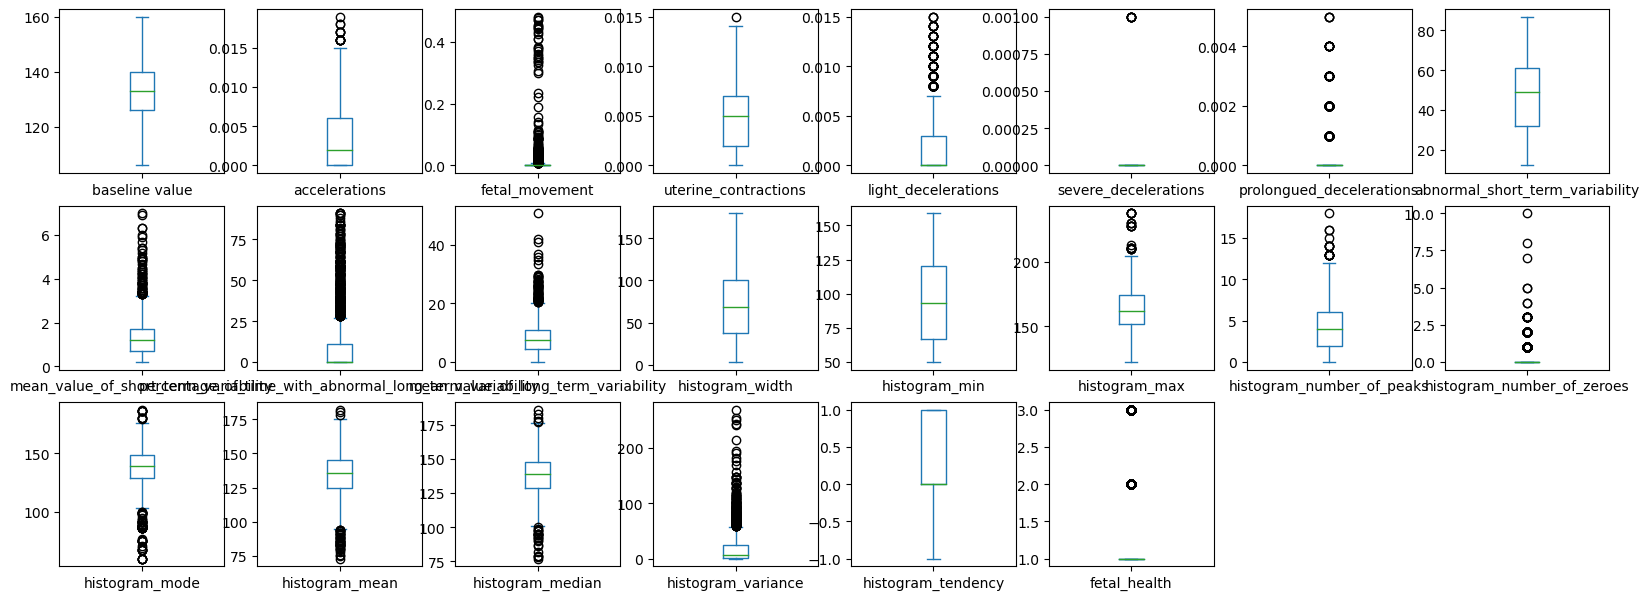

In [12]:
fig1 = data.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (8,8))

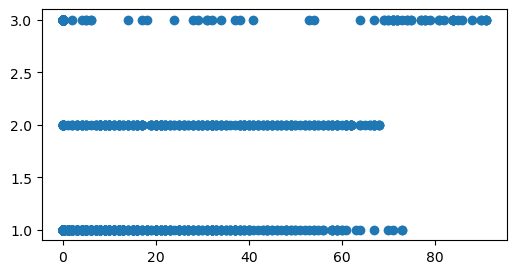

In [14]:
plt.figure(figsize=(6, 3))
plt.scatter(data['percentage_of_time_with_abnormal_long_term_variability'],data['fetal_health'])
plt.savefig("percentage of time with abnormal long term variability.png")

In [15]:
data2 = data[~((data['fetal_health'] == 1) & (data['percentage_of_time_with_abnormal_long_term_variability'] > 65))]

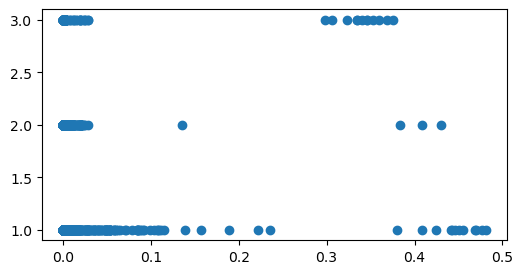

In [16]:
plt.figure(figsize=(6, 3))
plt.scatter(data['fetal_movement'],data['fetal_health'])
plt.savefig("Fetal movement.png")

In [17]:
data2 = data[~((data['fetal_health'] == 2) & (data['fetal_movement'] > 0.3))]

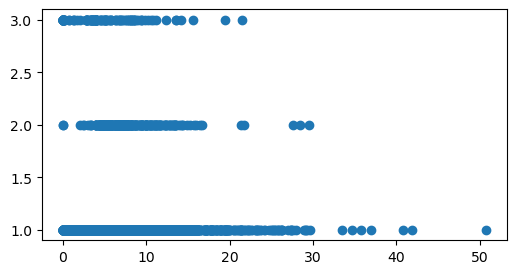

In [18]:
plt.figure(figsize=(6, 3))
plt.scatter(data['mean_value_of_long_term_variability'],data['fetal_health'])
plt.savefig("mean value of long term variability.png")

In [19]:
data2 = data[~((data['fetal_health'] == 2) & (data['mean_value_of_long_term_variability'] > 20))]
data2 = data[~((data['fetal_health'] == 1) & (data['mean_value_of_long_term_variability'] > 33))]
data2 = data[~((data['fetal_health'] == 3) & (data['mean_value_of_long_term_variability'] > 19))]

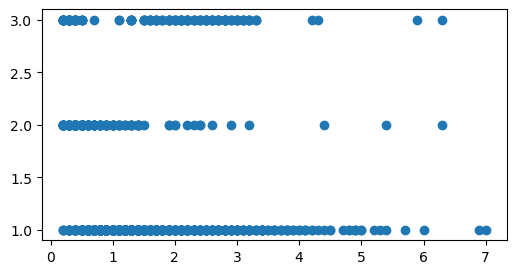

In [21]:
plt.figure(figsize=(6, 3))
plt.scatter(data['mean_value_of_short_term_variability'],data['fetal_health'])
plt.savefig("mean value od short term variability.png")

In [22]:
data2 = data[~((data['fetal_health'] == 2) & (data['mean_value_of_short_term_variability'] > 3))]
data2 = data[~((data['fetal_health'] == 1) & (data['mean_value_of_short_term_variability'] > 6))]
data2 = data[~((data['fetal_health'] == 3) & (data['mean_value_of_short_term_variability'] > 4))]

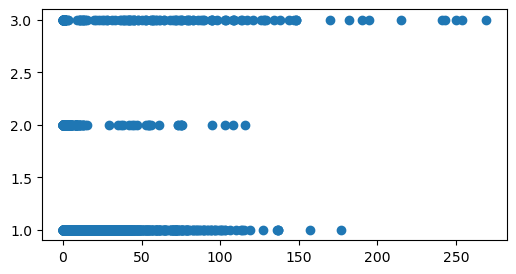

In [24]:
plt.figure(figsize=(6, 3))
plt.scatter(data['histogram_variance'],data['fetal_health'])
plt.savefig("histogram variance.png")

In [25]:
data2 = data[~((data['fetal_health'] == 1) & (data['histogram_variance'] > 150))]
data2 = data[~((data['fetal_health'] == 3) & (data['histogram_variance'] > 150))]

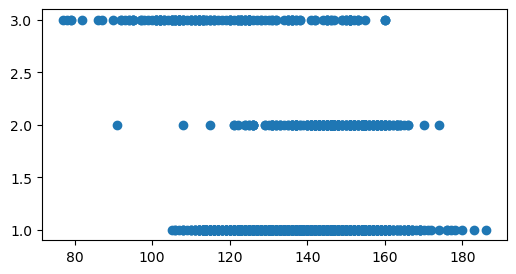

In [26]:
plt.figure(figsize=(6, 3))
plt.scatter(data['histogram_median'],data['fetal_health'])
plt.savefig("histogram median.png")

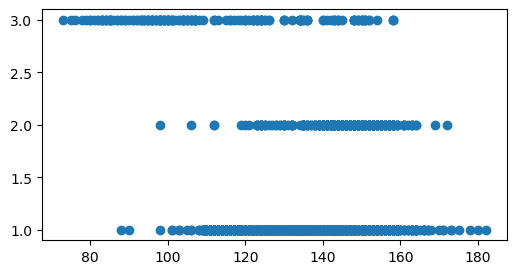

In [27]:
plt.figure(figsize=(6, 3))
plt.scatter(data['histogram_mean'],data['fetal_health'])
plt.savefig("histogram mean.png")

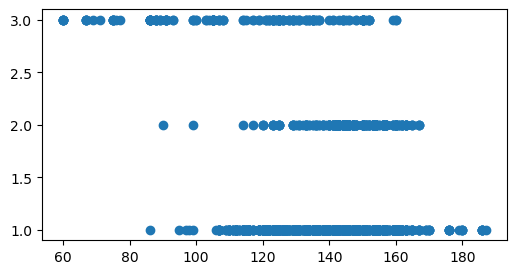

In [28]:
plt.figure(figsize=(6, 3))
plt.scatter(data['histogram_mode'],data['fetal_health'])
plt.savefig("histogram mode.png")

In [29]:
data2 = data[~((data['fetal_health'] == 1) & (data['histogram_mode'] > 167))]
data2 = data[~((data['fetal_health'] == 3) & (data['histogram_mode'] > 157))]

In [30]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data2)
scaled_data

array([[-0.92857143, -0.33333333,  0.        , ...,  3.        ,
         1.        ,  1.        ],
       [-0.07142857,  0.66666667,  0.        , ...,  0.22727273,
         0.        ,  0.        ],
       [ 0.        ,  0.16666667,  0.        , ...,  0.27272727,
         0.        ,  0.        ],
       ...,
       [ 0.5       , -0.16666667,  0.        , ..., -0.13636364,
         1.        ,  1.        ],
       [ 0.5       , -0.16666667,  0.        , ..., -0.13636364,
         1.        ,  1.        ],
       [ 0.64285714,  0.        ,  0.66666667, ..., -0.27272727,
         0.        ,  0.        ]])

In [31]:

data2 = pd.DataFrame(scaled_data, columns=data.columns)
data2

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-0.928571,-0.333333,0.000000,-1.0,0.0,0.0,0.0,0.827586,-0.7,3.909091,...,-0.584906,-1.636364,-0.50,0.0,-1.000000,0.05,-0.947368,3.000000,1.0,1.0
1,-0.071429,0.666667,0.000000,0.2,1.0,0.0,0.0,-1.103448,0.9,0.000000,...,-0.471698,1.636364,0.50,1.0,0.105263,0.00,0.052632,0.227273,0.0,0.0
2,0.000000,0.166667,0.000000,0.6,1.0,0.0,0.0,-1.137931,0.9,0.000000,...,-0.471698,1.636364,0.25,1.0,0.105263,-0.05,-0.052632,0.272727,0.0,0.0
3,0.071429,0.166667,0.000000,0.6,1.0,0.0,0.0,-1.137931,1.2,0.000000,...,-0.754717,0.363636,1.75,0.0,-0.105263,-0.10,-0.105263,0.272727,1.0,0.0
4,-0.071429,0.833333,0.000000,0.6,0.0,0.0,0.0,-1.137931,1.2,0.000000,...,-0.754717,0.363636,1.25,0.0,-0.105263,0.00,-0.052632,0.181818,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.500000,-0.333333,0.000000,0.4,0.0,0.0,0.0,1.034483,-1.0,2.272727,...,0.830189,0.681818,0.00,0.0,0.736842,0.70,0.684211,-0.227273,0.0,1.0
2106,0.500000,-0.166667,0.000000,0.4,0.0,0.0,0.0,1.000000,-0.8,2.000000,...,0.188679,0.318182,0.50,0.0,0.684211,0.60,0.631579,-0.181818,1.0,1.0
2107,0.500000,-0.166667,0.000000,0.4,0.0,0.0,0.0,1.034483,-0.8,1.818182,...,0.188679,0.363636,0.25,0.0,0.736842,0.60,0.684211,-0.136364,1.0,1.0
2108,0.500000,-0.166667,0.000000,0.2,0.0,0.0,0.0,1.000000,-0.8,2.454545,...,0.188679,0.318182,0.50,0.0,0.684211,0.55,0.631579,-0.136364,1.0,1.0


AutoMl

In [32]:
from IPython.display import Image

Image(url='https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img,w_622/https://www.justintodata.com/wp-content/uploads/2022/03/image-1.png')

So AutoML should handle tasks like:
- data preprocessing
- algorithm selection
- hyperparameter tuning
- model training

In [33]:
sample_size = data.shape[0]-200
data_train = data.iloc[:sample_size].copy()
data_test = data.iloc[sample_size:].copy()

## PyCaret

!pip install pycaret

In [34]:
from pycaret.classification import setup, compare_models, predict_model
pycaret_automl= setup(data = data_train , target = 'fetal_health',session_id = 666)

ModuleNotFoundError: No module named 'pycaret'

In [29]:
pycaret_models = compare_models(budget_time=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:26:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9515,0.9908,0.9419,0.9484,0.9435,0.8636,0.8663,0.0780
lightgbm,Light Gradient Boosting Machine,0.9515,0.9892,0.9411,0.9515,0.9440,0.8617,0.8650,0.2520
gbc,Gradient Boosting Classifier,0.9463,0.9846,0.9366,0.9428,0.9383,0.8479,0.8505,0.3050
rf,Random Forest Classifier,0.9403,0.9856,0.9281,0.9365,0.9294,0.8275,0.8322,0.0900
dt,Decision Tree Classifier,0.9343,0.9099,0.9288,0.9257,0.9266,0.8190,0.8201,0.0140
et,Extra Trees Classifier,0.9261,0.9813,0.9106,0.9212,0.9132,0.7875,0.7919,0.0950
knn,K Neighbors Classifier,0.8977,0.9177,0.8793,0.8816,0.8750,0.6914,0.7013,0.0290
lda,Linear Discriminant Analysis,0.8932,0.9606,0.8792,0.8831,0.8789,0.6957,0.6979,0.0210
ada,Ada Boost Classifier,0.8902,0.9194,0.8795,0.8819,0.8775,0.6845,0.6902,0.0490
lr,Logistic Regression,0.8850,0.9250,0.8676,0.8707,0.8639,0.6621,0.6688,0.9370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [30]:
predictions = predict_model(pycaret_models,data = data_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7350,0.8922,0.7350,0.9133,0.7897,0.4907,0.5640
